# Results

This notebook is to save the result of our simulation

In [1]:
%load_ext sql
import pandas as pd
import sqlite3
import pylab as plt
import os


In [5]:
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'

model_name  = 'Balance'
# 'Single_Cross_Straight'
# 'Single_Cross_Triple'
# 'Single_Cross_Triple_Mod'
# 'Single_Cross_Mod2'
# 'Balance'

agent_type = 'AC'        # DQN, DuelingDQN, DDQN, DuelingDDQN AC SURTRAC MOVA

# different demand shape
demand = 'demand1'

# hyperparameter and NN shape of the leaning
lr = 'lr_0.000015'
entropy = 'e_0.00001'
structure = 'C_0/V_1*42/P_1*42'
n_step = 'n_step_32'
gamma = 'gamma_0.95'




# Path to the database
#DBPATH = os.path.join(vissim_working_directory, model_name ,model_name +'.results','1.db')
DBPATH = os.path.join(vissim_working_directory, "Balance_VISSIM_original", "PTV Balance PTV Epics Vision Suite Workflow.results", "24.db")

In [6]:
# Connect to the database
conn = sqlite3.connect(DBPATH)

In [7]:
# Select the appropriate metric the cumulative delay and the cumulative stop delay

df = pd.read_sql_query('SELECT \
                        CAST(ARG_TIMEINTERVAL AS BIGINT) AS Time, \
                        sum(DELAYSTOPTOT) OVER (ORDER BY CAST(ARG_TIMEINTERVAL AS BIGINT)) as CumStopDelay, \
                        sum(DELAYTOT) OVER (ORDER BY CAST(ARG_TIMEINTERVAL AS BIGINT)) as CumDelay \
                        FROM VEHICLENETWORKPERFORMANCEMEASUREMENT_EvaluationTimeIntervalClass' ,conn)



                    

In [8]:
df

,Time,CumStopDelay,CumDelay
0,1,1.364654e+04,2.035582e+04
1,1,1.364654e+04,2.035582e+04
2,1,1.364654e+04,2.035582e+04
3,1,1.364654e+04,2.035582e+04
4,2,3.894714e+04,5.930964e+04
5,2,3.894714e+04,5.930964e+04
6,2,3.894714e+04,5.930964e+04
7,2,3.894714e+04,5.930964e+04
8,3,6.046535e+04,9.144968e+04
9,3,6.046535e+04,9.144968e+04


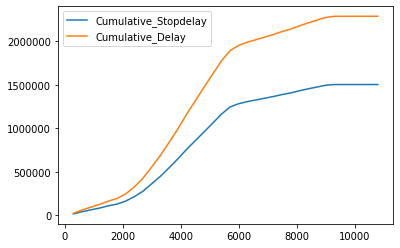

In [12]:
# plot the result of the current model

plt.plot(df['Time']*300,df['CumStopDelay'], label = 'Cumulative_Stopdelay' )
plt.plot(df['Time']*300,df['CumDelay'], label = 'Cumulative_Delay')

plt.legend()

In [9]:
# plot the result of the current model

plt.plot(range(df['Time'][14403]),df['CumStopDelay'][::4], label = 'Cumulative_Stopdelay' )
plt.plot(range(df['Time'][14403]),df['CumDelay'][::4], label = 'Cumulative_Delay')

plt.legend()

KeyError: 14403

In [7]:
results_path = 'results_'+ model_name +'_' +demand + '.csv'

In [8]:

# Open the files containing the result of all the simulation
results_path = 'results_'+ model_name +'_'+demand + '.csv'

results = pd.read_csv(results_path)

In [9]:
# Special MOVA Save


#results['MOVA'+'_'+'CumStopDelay'] = df['CumStopDelay']
#results['MOVA'+'_'+'CumDelay'] = df['CumDelay']

In [10]:
# Special Surtrac Save
#results['SURTRAC'+'_'+'CumStopDelay'] = df['CumStopDelay']
#results['SURTRAC'+'_'+'CumDelay'] = df['CumDelay']

In [11]:
# Special fixed_time save
#results['Fixed90'+'_'+'CumStopDelay'] = df['CumStopDelay']
#results['Fixed90'+'_'+'CumDelay'] = df['CumDelay']

In [12]:
# Special Random save
#results['RandomMin6'+'_'+'CumStopDelay'] = df['CumStopDelay']
#results['RandomMin6'+'_'+'CumDelay'] = df['CumDelay']

In [16]:
# Add the current result to our result table

results[agent_type+'_'+lr+'_'+entropy+'_'+structure+'_'+n_step+'_'+gamma+'_'+'CumStopDelay'] = df['CumStopDelay']
results[agent_type+'_'+lr+'_'+entropy+'_'+structure+'_'+n_step+'_'+gamma+'_'+'CumDelay'] = df['CumDelay']

print(agent_type+'_'+lr+'_'+entropy+'_'+structure+'_'+n_step+'_'+gamma)

AC_lr_0.000015_e_0.00001_C_0/V_1*42/P_1*42_n_step_32_gamma_0.99


In [14]:
results

,Time,MOVA_CumStopDelay,MOVA_CumDelay,SURTRAC_CumStopDelay,SURTRAC_CumDelay,Fixed90_CumStopDelay,Fixed90_CumDelay,AC_lr_0.000065_e_0.00001_C_0/V_1*42/P_1*42_n_step_32_gamma_0.99_CumStopDelay,AC_lr_0.000065_e_0.00001_C_0/V_1*42/P_1*42_n_step_32_gamma_0.99_CumDelay,RandomMin6_CumStopDelay,RandomMin6_CumDelay,AC_lr_0.000015_e_0.00001_C_0/V_1*42/P_1*42_n_step_32_gamma_0.99_CumStopDelay,AC_lr_0.000015_e_0.00001_C_0/V_1*42/P_1*42_n_step_32_gamma_0.99_CumDelay
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Saving the result in a files !!!! Be careful not to erase everything....  !!!!


#results.to_csv(results_path,index=False)

In [9]:
bla = pd.DataFrame()

In [10]:
bla['Time'] = df['Time']

In [11]:
#bla.to_csv(results_path,index=False)

In [12]:
bla

,Time
0,1
1,1
2,1
3,1
4,2
5,2
6,2
7,2
8,3
9,3
